In [7]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
customer_df.set_index('Customer', inplace=True)


customer_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.shape

(9134, 23)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null

In [6]:
numerical_df = customer_df.select_dtypes(include=['float64', 'int64'])
categorical_df = customer_df.select_dtypes(include=['object'])


numerical_df_shape = numerical_df.shape
categorical_df_shape = categorical_df.shape

numerical_df_shape, categorical_df_shape

((9134, 8), (9134, 15))

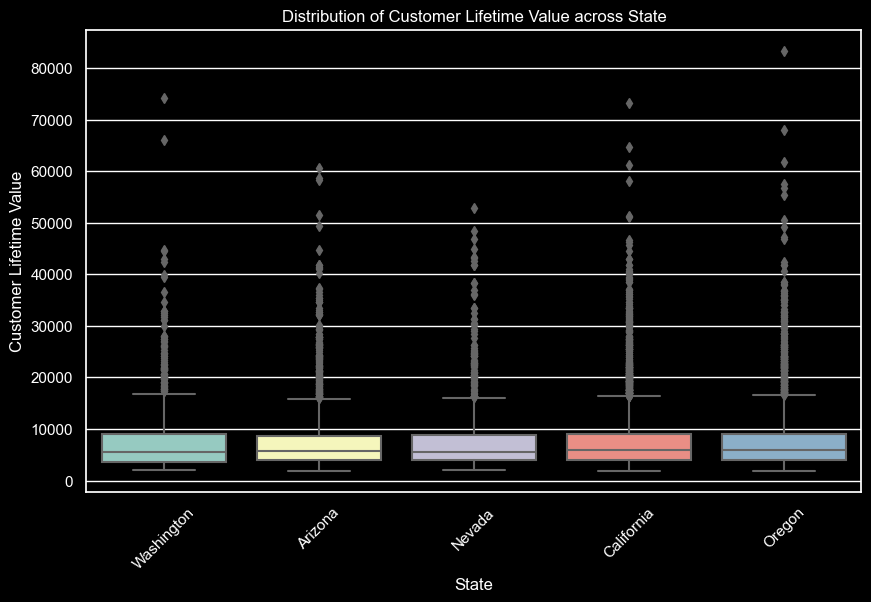

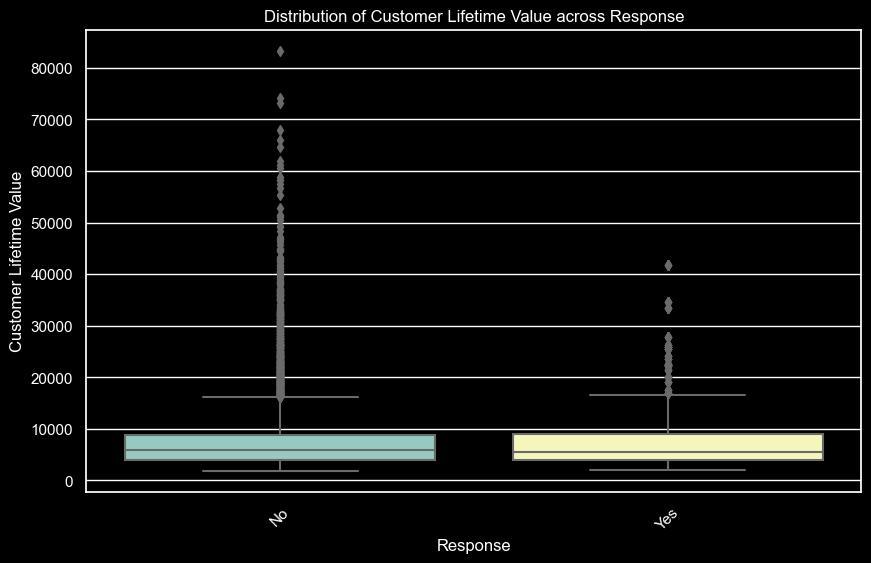

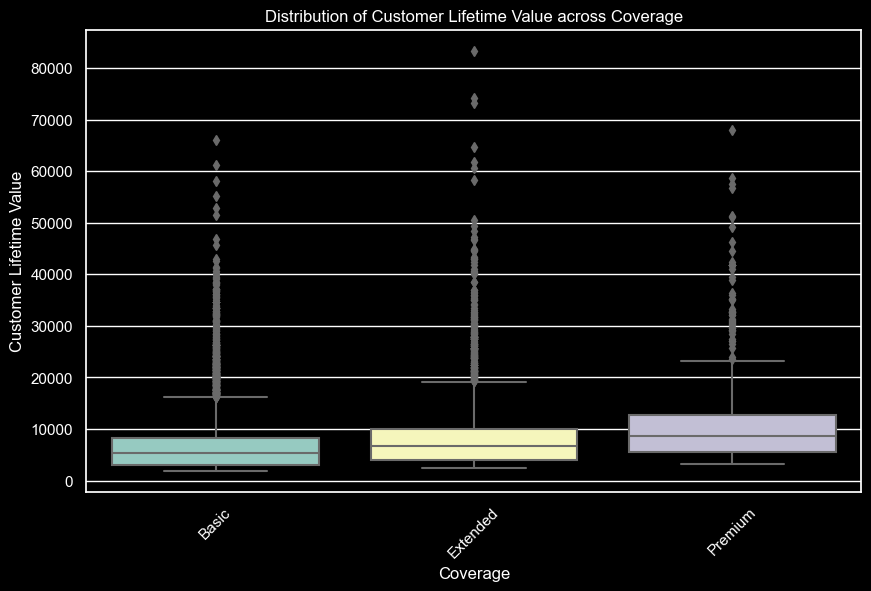

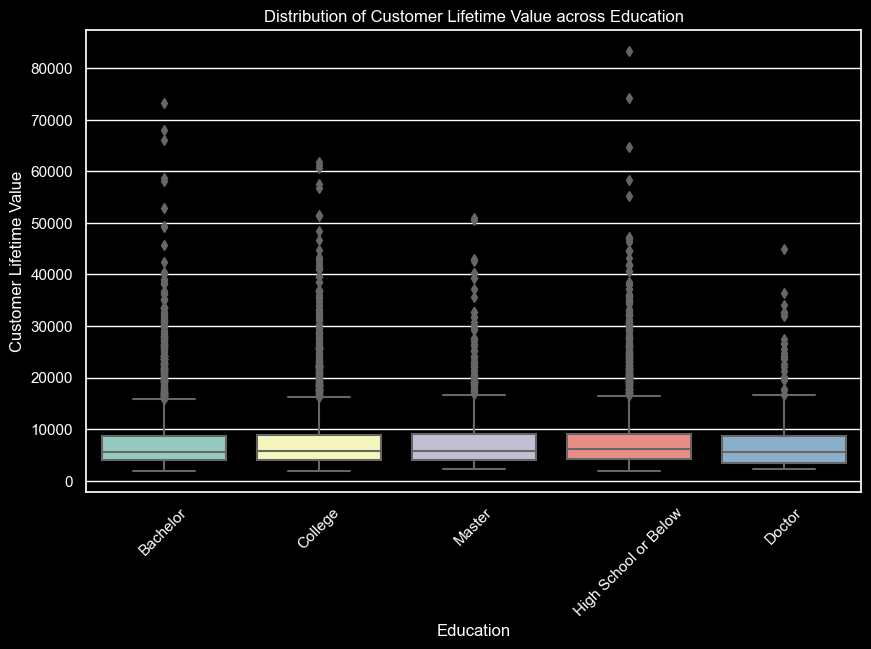

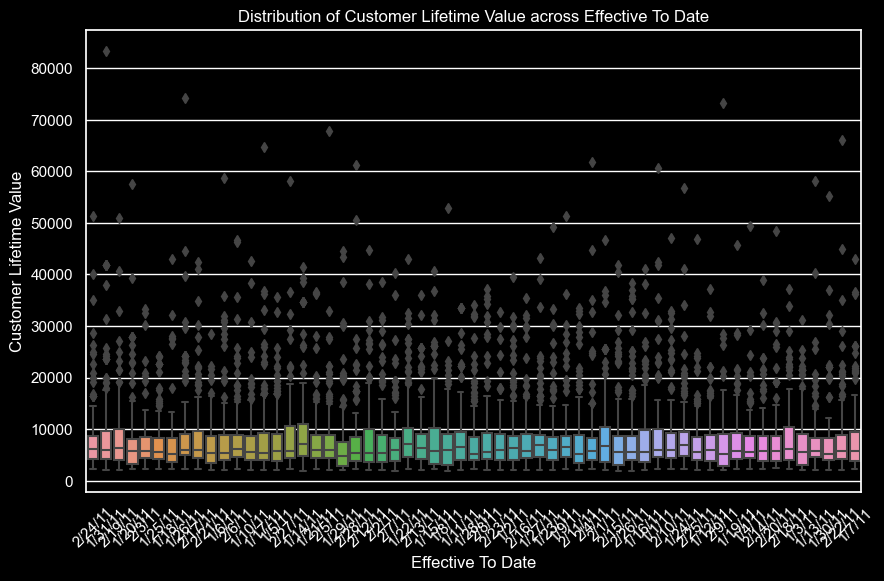

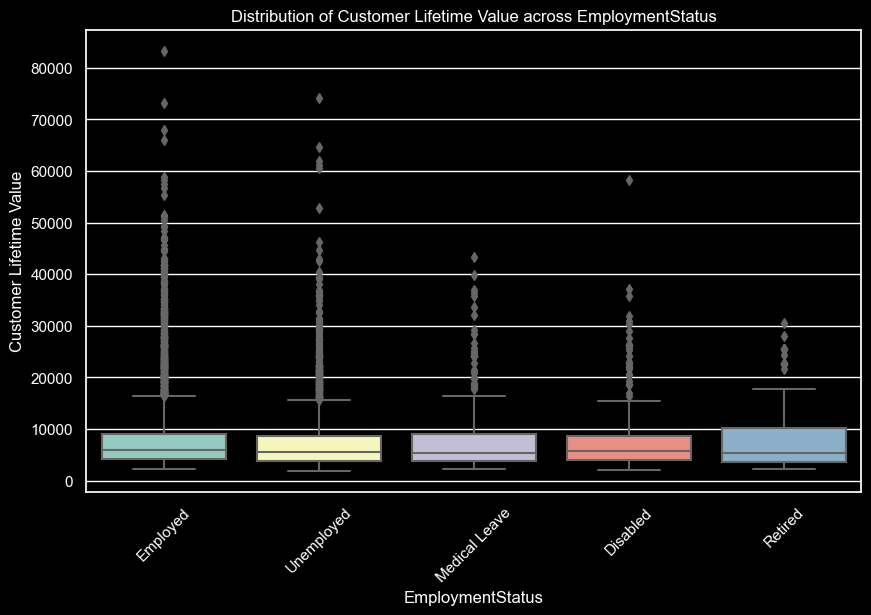

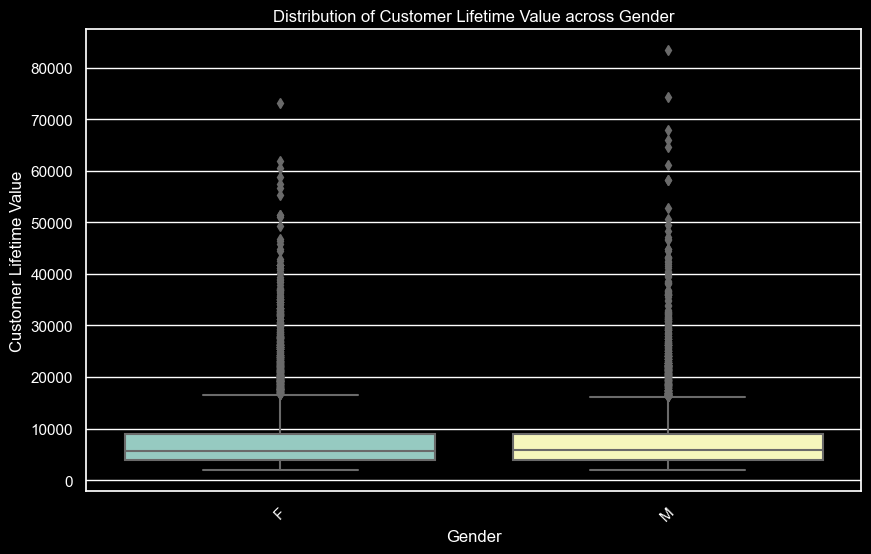

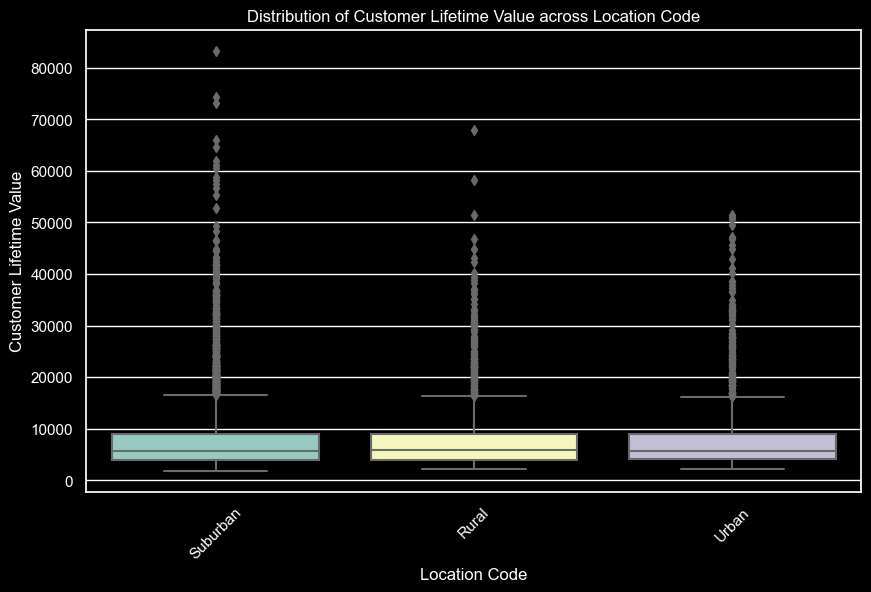

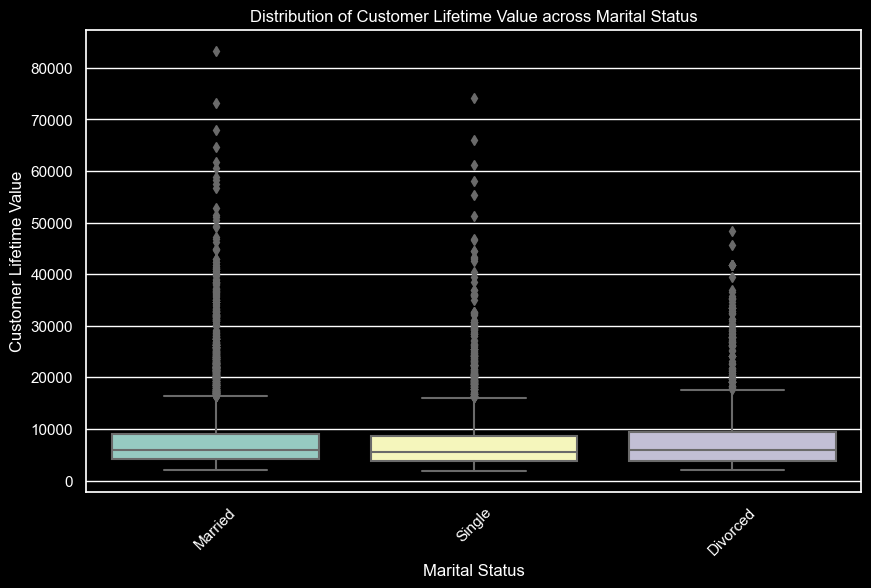

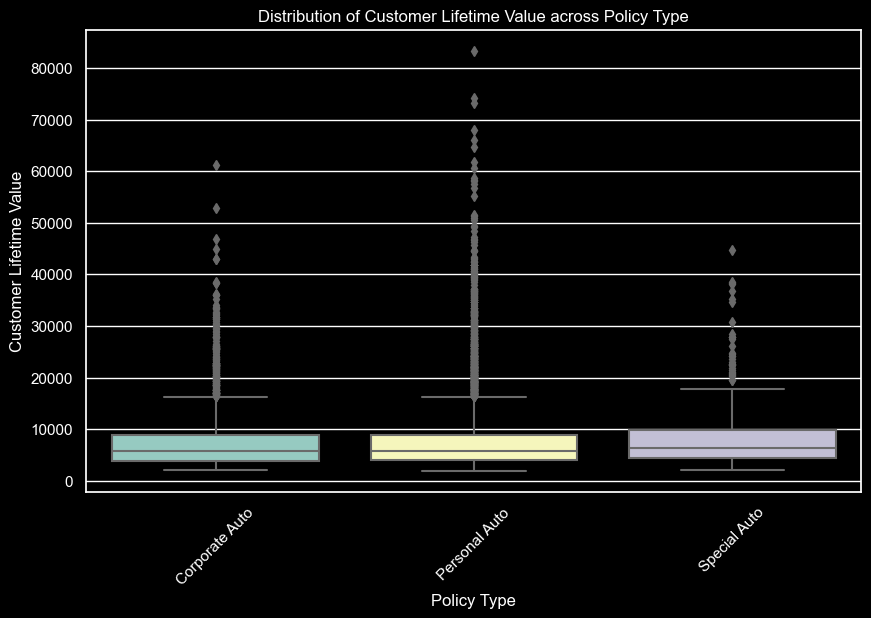

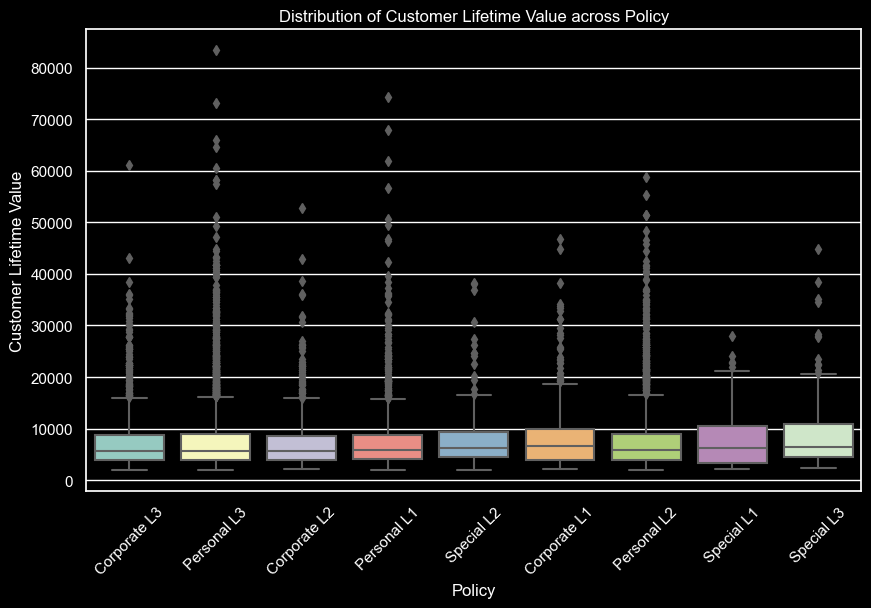

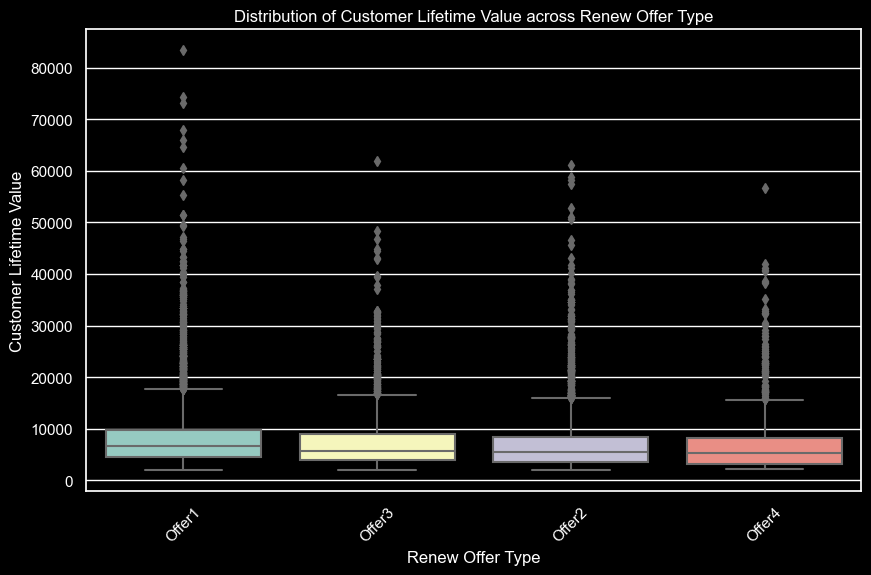

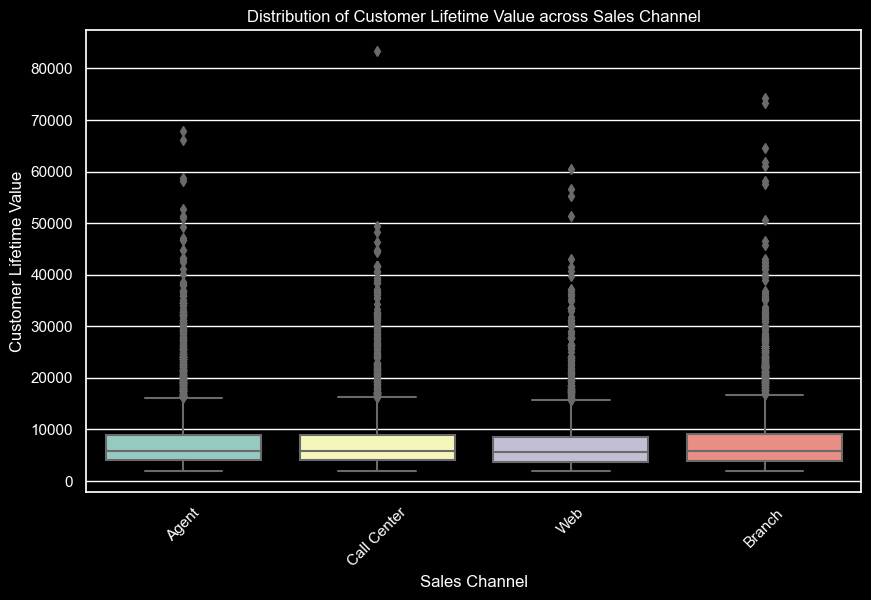

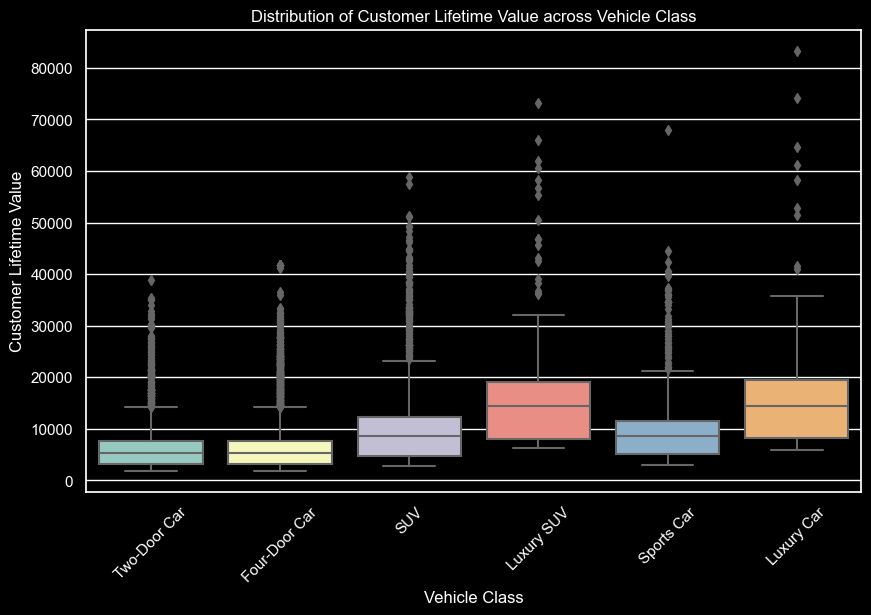

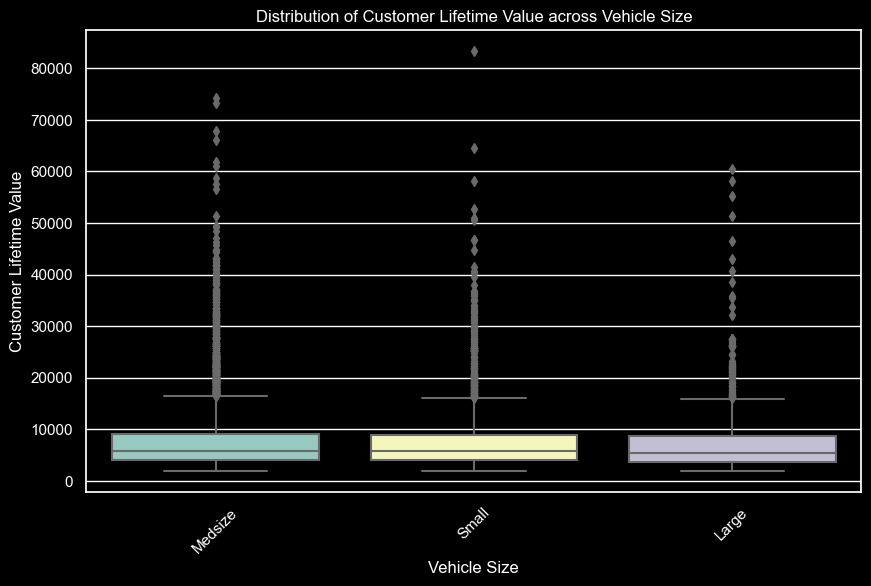

In [8]:
numerical_target = 'Customer Lifetime Value'
categorical_columns = customer_df.select_dtypes(include=['object']).columns

sns.set(style="darkgrid")
plt.style.use("dark_background")

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y=numerical_target, data=customer_df)
    plt.title(f'Distribution of {numerical_target} across {column}')
    plt.xticks(rotation=45)
    plt.show()

In [9]:
categorical_columns = customer_df.select_dtypes(include=['object']).columns

category_value_counts = {column: customer_df[column].value_counts() for column in categorical_columns}

category_value_counts

{'State': State
 California    3150
 Oregon        2601
 Arizona       1703
 Nevada         882
 Washington     798
 Name: count, dtype: int64,
 'Response': Response
 No     7826
 Yes    1308
 Name: count, dtype: int64,
 'Coverage': Coverage
 Basic       5568
 Extended    2742
 Premium      824
 Name: count, dtype: int64,
 'Education': Education
 Bachelor                2748
 College                 2681
 High School or Below    2622
 Master                   741
 Doctor                   342
 Name: count, dtype: int64,
 'Effective To Date': Effective To Date
 1/10/11    195
 1/27/11    194
 2/14/11    186
 1/26/11    181
 1/17/11    180
 1/19/11    179
 1/31/11    178
 1/3/11     178
 1/20/11    173
 2/26/11    169
 1/28/11    169
 2/19/11    168
 1/5/11     167
 2/27/11    167
 1/11/11    166
 2/4/11     164
 2/10/11    161
 2/28/11    161
 1/2/11     160
 1/21/11    160
 1/29/11    160
 2/22/11    158
 2/5/11     158
 2/3/11     158
 2/7/11     157
 2/12/11    156
 1/23/11    155
 2

Categorical Columns: Most categorical columns are clean and well-structured.

Effective To Date Column: This column could be converted to datetime format to facilitate time series analysis or to extract specific date features, such as day of the week or month.

Data Quality: There is no evident mislabeling or typos in the categories, indicating minimal to no categorical data cleaning is required beyond the potential date conversion.